# 第五章 决策树

1. 什么是决策树？
2. 决策树算法包括哪些？
3. 如何进行特征选择？
4. 信息增益比是什么？相比于信息增益有什么好处？

## 1. 概念

1. 分类决策树模型是表示基于特征对实例进行分类的树形结构。决策树可以转换成if-then规则的集合。也可以看做是定义在特征空间划分上的类的条件概率分布。
2. 决策树学习旨在构建一个与训练数据拟合很好，并且复杂度小的决策树。因为从可能的决策树中直接选取最优决策树是个NP完全问题。现实中采用启发式方法学习次优的决策树。
决策树学习算法包括3部分：特征选择、树的生成和树的剪枝。常用的算法有ID3、C4.5、CART。
3. 特征选择的目的在于选取对训练数据能够分类的特征。特征选择的关键是准则。

4. 决策树的生成。通常使用信息增益最大、信息增益比最大或基尼指数最小作为特征选择的准则。决策树的生成往往通过计算信息增益或者其他指标，从根节点开始，递归的产生决策树。这相当于用信息增益或其他准则不断地选取局部最优的特征，或将训练集分割为能够基本正确分类的子集。

5. 决策树的剪枝。由于生产决策树存在过拟合问题，需要对它进行剪枝，以简化学到的决策树。决策树的剪枝，往往从已生产的树上剪掉一些叶节点或叶节点以上的子树，并将其父节点或跟节点作为新的叶节点，从而简化生成的决策树。

## 2. ID3算法

**信息增益：信息不确定性的减少程度**

样本集合D对特征A的信息增益（ID3）

$$g(D,A)=H(D) - H(D|A)$$
$$H(D) = -\sum_{k=1}^K{\frac{|C_k|}{|D|}log_2 \frac{|C_k|}{|D|}}$$
$$H(D|A) = \sum_{i=1}^{n}{\frac{|D_i|}{|D|}H(D_i)}$$

其中H(D)是数据集$D$的熵，$H(D_i)$是数据集$D_i$的熵，$H(D|A)$是数据集D对特征$A$的条件熵。$D_i$是$D$中特征$A$取第i个值的样本子集，$C_k$是$D$中属于第k类的样本的子集。$n$是特征$A$取值的个数，$K$是类的个数。

优点：
- 决策树构建速度快；实现简单

缺点：
- 不能处理缺失值
- 不能处理连续型特征
- 采用信息增益作为选择最优划分特征的标准，会偏向那些取值比较多的特征


## 3. C4.5算法

样本集合D对特征A的信息增益比（C4.5）

$$g_R(D,A)=\frac{g(D,A)}{H(D)}$$
其中，$g(D,A)$是信息增益，$H(D)$是数据集D的熵。

- 改用信息增益率来选择划分特征，克服了用信息增益选择的不足，但信息增益率对可选取值数目较少的属性有所偏好。
- 能够处理离散型和连续型的属性类型。（连续型的属性进行离散化处理）
- 能够处理具有缺失属性值的训练数据。


### 对连续特征的处理

**对数据进行离散化：**

1. m个样本的连续特征A有m个值，从小到大排列 $a_1,a_2,...,a_m$，取相邻两个样本值的平均值做划分点，一共有m-1个，其中第i个划分点$T_i$表示为：$T_i=(a_i+a_{i+1})/2$
2. 分别计算以这$m-1$个点作为二元切分点时的信息增益率，选择信息增益率最大的点为该连续特征的最佳切分点。比如取到的信息增益率最大的点为$a_t$，则小于$a_t$的值类别为1，大于$a_t$的类别为2，这样就做到了连续特征的离散化。

### 对缺失值的处理

采用概率权重的方法，主要有三种情况：

1. 在有缺失值的特征上如何计算信息增益率？

**根据缺失比例，折算信息增益（无缺失值样本所占的比例乘以无缺失值样本子集的信息增益）和信息增益率**

2. 选定了划分属性后，若样本在该属性上的值是缺失的，那么如何对这个样本进行划分？

**将样本以不同概率同时划分到不同节点中，概率是根据其他非缺失属性的比例来得到的**

3. 对新样本进行分类时，如果测试样本特征有缺失值如何判断其类别？

**走所有分支，计算每个类别的概率，取概率最大的类别赋值给该样本**


### 剪枝

为什么要剪枝？ 减少过拟合。

剪枝分为前剪枝和后剪枝，前剪枝是指在构造的过程中就知道哪些节点可以剪掉。后剪枝是指构造出完整的决策树之后再来考虑哪些子树可以剪掉。

前剪枝：

- 节点内的数据样本数小于切分最小样本数阈值；
- 所有节点特征都已分裂
- 节点划分前准确率比划分后准确率高

后剪枝：

C4.5算法采用悲观剪枝方法。根据剪枝前后的误判率来判定是否进行子树的修剪， 如果剪枝后与剪枝前相比其误判率是保持或者下降，则这棵子树就可以被替换为一个叶子节点。 因此，不需要单独的剪枝数据集。C4.5 通过训练数据集上的错误分类数量来估算未知样本上的错误率。


## 4. CART树-分类树

ID3和C4.5算法，生成的决策树是多叉树，只能处理分类不能处理回归。而CART(classification and regression tree)分类回归树算法，即可用于分类也可用于回归。分类树的输出是样本的类别，回归树的输出是一个实数。


样本集合D的基尼指数（CART）

$$Gini(D)=1-\sum_{k=1}^{K}{(\frac{|C_k|}{|D|})^2}$$

特征A条件下集合D的基尼指数：
$$Gini(D,A)=\frac{|D_1|}{|D|}Gini(|D_1|)+\frac{|D_2|}{|D|}Gini(D_2)$$

**Gini(D)越小，则数据集D的纯度越高**

分类过程：对于样本D，个数为$|D|$，根据特征A是否取某一可能值a，把样本D分成两部分$D_1$和$D_2$，所以CART分类树算法建立起来的是二叉树，而不是多叉树。

在ID3和C4.5算法中，每一个特征只参与一次划分。而在CART中，特征被划分一次后，还能接着往下被划分。


## 5 CART树-回归树

**采用误差平方和来度量划分好坏**

建立CART回归树的步骤：

1. 计算各个特征各个值划分的两部分$D_1$和$D_2$的误差平方和，选择误差平方和最小的作为最优特征和最优切分点：

$$\min_{A,a}[\min_{c_1} \sum_{x_i \in D_1 (A,a)}{(y_i-c_1)^2} + \min_{c_2} \sum_{x_i\in D_2(A,a)}{(y_i-c_2)^2}]$$

其中，$c_1$是$D_1$的样本输出均值，$c_2$为$D_2$的样本输出均值。

2. 根据最优特征A和最优特征切分点a，将本节点的数据集划分两部分$D_1$和$D_2$，并给出相应的输出值。

$$D_1(A,a)=(x,y) \in D|A(x) <= a$$
$$D_2(A,a)=(x,y) \in D|A(x) > a$$
$$c_1 = mean(y_i|x_i \in D_1(A,a))$$
$$c_2 = mean(y_i|x_i \in D_2(A,a))$$

3. 继续对两个子集调用1-2步骤，直到满足停止条件。

4. 生成回归树

决策树：
$$f(x)=\sum_{m=1}^M \hat{c_m} I$$
$$\hat{c_m}=\frac{1}{N_m}\sum_{x_i\in D_m}y_i$$

# ID3代码

In [1]:
import numpy as np
import pandas as pd
from math import log

D:\software\anaconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\software\anaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\software\anaconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# 数据集
# 样本数 x 特征数
# 书上题目5.1
def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    # 返回数据集和每个维度的名称
    return datasets, labels

In [3]:
datasets, labels = create_data()

In [4]:
train_data = pd.DataFrame(datasets, columns=labels)

In [5]:
train_data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [6]:
# 计算熵
def calc_ent(datasets):
    catogeries = pd.unique(datasets[datasets.columns[-1]])
    ans = 0
    for x in catogeries:
        tmp = sum(datasets[datasets.columns[-1]]==x)/len(datasets)
        ans += -tmp*np.log(tmp)
    return ans

In [7]:
calc_ent(train_data)

0.6730116670092565

In [8]:
# 经验条件熵
def cond_ent(datasets, axis=0):
    features = datasets.columns
    sel_feature = features[axis]
    sel_feature_vals = pd.unique(datasets[sel_feature])
    ans = 0
    for x in sel_feature_vals:
        t_dataset = datasets[datasets[sel_feature]==x]
        ans += len(t_dataset)/len(datasets) * calc_ent(t_dataset)
    return ans

In [9]:
cond_ent(train_data, 0)

0.6154752525189002

In [121]:
# 信息增益
def info_gain(ent, cond_ent):
    return ent - cond_ent

def info_gain_train(datasets):
    count = len(datasets.columns) - 1
    ent = calc_ent(datasets)
    best_feature = []
    for c in range(count):
        c_info_gain = info_gain(ent, cond_ent(datasets, c))
        best_feature.append((c, c_info_gain))
        
    return max(best_feature, key=lambda x: x[-1])

In [122]:
# def calc_ent(datasets):
#         data_length = len(datasets)
#         label_count = {}
#         for i in range(data_length):
#             label = datasets[i][-1]
#             if label not in label_count:
#                 label_count[label] = 0
#             label_count[label] += 1
#         ent = -sum([(p / data_length) * log(p / data_length, 2)
#                     for p in label_count.values()])
#         return ent

# # 经验条件熵
# def cond_ent(datasets, axis=0):
#     data_length = len(datasets)
#     feature_sets = {}
#     for i in range(data_length):
#         feature = datasets[i][axis]
#         if feature not in feature_sets:
#             feature_sets[feature] = []
#         feature_sets[feature].append(datasets[i])
#     cond_ent = sum([(len(p) / data_length) * calc_ent(p)
#                     for p in feature_sets.values()])
#     return cond_ent

# # 信息增益
# def info_gain(ent, cond_ent):
#     return ent - cond_ent

# def info_gain_train(datasets):
#     count = len(datasets[0]) - 1
#     ent = calc_ent(datasets)
#     best_feature = []
#     for c in range(count):
#         c_info_gain = info_gain(ent, cond_ent(datasets, axis=c))
#         best_feature.append((c, c_info_gain))
#     # 比较大小
#     best_ = max(best_feature, key=lambda x: x[-1])
#     return best_

In [123]:
class Node:
    def __init__(self, root=True, label=None, feature_name=None, feature=None):
        self.root = root
        self.label = label
        self.feature_name = feature_name
        self.feature = feature
        self.tree = {}
        self.result = {
            'label': self.label,
            'feature': self.feature,
            'tree': self.tree
        }
        
    def __repr__(self):
        return '{}'.format(self.result)
    
    def add_node(self, val, node):
        self.tree[val] = node
    
    def predict(self, features):
        if self.root is True:
            return self.label
        return self.tree[features[self.feature]].predict(features)

# class Node:
#     def __init__(self, root=True, label=None, feature_name=None, feature=None):
#         self.root = root
#         self.label = label
#         self.feature_name = feature_name
#         self.feature = feature
#         self.tree = {}
#         self.result = {
#             'label:': self.label,
#             'feature': self.feature,
#             'tree': self.tree
#         }

#     def __repr__(self):
#         return '{}'.format(self.result)

#     def add_node(self, val, node):
#         self.tree[val] = node

#     def predict(self, features):
#         if self.root is True:
#             return self.label
#         return self.tree[features[self.feature]].predict(features)

In [128]:
def train(train_data):
    y_train = train_data.iloc[:, -1]
    features = train_data.columns[:-1]
    
    # 1. 仅剩一个类
    if len(y_train.value_counts())==1:
        return Node(root=True, label=y_train.iloc[0])
    # 2. 已无特征可以挑选
    if len(features) == 0:
        return Node(root=True, label=y_train.value_counts().sort_values(ascending=False).index[0])
    
    # 3. 计算最大信息增益
    max_feature, max_info_gain = info_gain_train(train_data)
    max_feature_name = features[max_feature]
    
    # 4. 
    if max_info_gain < 0.1:
        return Node(root=True, label=y_train.value_counts().sort_values(ascending=False).index[0])
    
    # 5. 构建 ag 子集
    node_tree = Node(root=False, feature_name=max_feature_name, feature=max_feature)
    feature_list = train_data[max_feature_name].value_counts().index
    for f in feature_list:
        sub_train_df = train_data.loc[train_data[max_feature_name]==f].drop([max_feature_name], axis=1)
     
    # 6. 递归生成树
        sub_tree = train(sub_train_df)
        node_tree.add_node(f, sub_tree)
    
    return node_tree

# def train(train_data):
#     """
#     input:数据集D(DataFrame格式)，特征集A，阈值eta
#     output:决策树T
#     """
# #     _, y_train, features = train_data.iloc[:, :-1], train_data.iloc[:,-1], train_data.columns[:-1]
#     y_train = train_data.iloc[:, -1]
#     features = train_data.columns[:-1]
# #     # 1,若D中实例属于同一类Ck，则T为单节点树，并将类Ck作为结点的类标记，返回T
# #     if len(y_train.value_counts()) == 1:
# #         return Node(root=True, label=y_train.iloc[0])

# #     # 2, 若A为空，则T为单节点树，将D中实例树最大的类Ck作为该节点的类标记，返回T
# #     if len(features) == 0:
# #         return Node(
# #             root=True,
# #             label=y_train.value_counts().sort_values(
# #                 ascending=False).index[0])
# # 1. 仅剩一个类
#     if len(y_train.value_counts())==1:
#         return Node(root=True, label=y_train.iloc[0])
#     # 2. 已无特征可以挑选
#     if len(features) == 0:
#         return Node(root=True, label=y_train.value_counts().sort_values(ascending=False).index[0])

#     # 3,计算最大信息增益 同5.1,Ag为信息增益最大的特征
# #     max_feature, max_info_gain = info_gain_train(np.array(train_data))
# #     max_feature_name = features[max_feature]
# # 3. 计算最大信息增益
#     max_feature, max_info_gain = info_gain_train(np.array(train_data))
#     max_feature_name = features[max_feature]

#     # 4,Ag的信息增益小于阈值eta,则置T为单节点树，并将D中是实例数最大的类Ck作为该节点的类标记，返回T
# #     if max_info_gain < 0.1:
# #         return Node(
# #             root=True,
# #             label=y_train.value_counts().sort_values(
# #                 ascending=False).index[0])
#     if max_info_gain < 0.1:
#         return Node(root=True, label=y_train.value_counts().sort_values(ascending=False).index[0])

# #     # 5,构建Ag子集
# #     node_tree = Node(
# #         root=False, feature_name=max_feature_name, feature=max_feature)

# #     feature_list = train_data[max_feature_name].value_counts().index
# #     for f in feature_list:
# #         sub_train_df = train_data.loc[train_data[max_feature_name] ==
# #                                       f].drop([max_feature_name], axis=1)
#     node_tree = Node(root=False, feature_name=max_feature_name, feature=max_feature)
#     feature_list = train_data[max_feature_name].value_counts().index
#     for f in feature_list:
#         sub_train_df = train_data.loc[train_data[max_feature_name]==f].drop([max_feature_name], axis=1)
     

#         # 6, 递归生成树
#         sub_tree = train(sub_train_df)
#         node_tree.add_node(f, sub_tree)
# #         sub_tree = train(sub_train_df)
# #     node_tree.add_node(f, sub_tree)

#     # pprint.pprint(node_tree.tree)
#     return node_tree

In [129]:
def fit(train_data):
    return train(train_data)

In [130]:
tree = fit(train_data)

In [131]:
tree

{'label': None, 'feature': 1, 'tree': {'否': {'label': None, 'feature': 1, 'tree': {'否': {'label': '否', 'feature': None, 'tree': {}}, '是': {'label': '是', 'feature': None, 'tree': {}}}}, '是': {'label': '是', 'feature': None, 'tree': {}}}}

In [132]:
tree.predict(['老年', '否', '否', '一般'])

'否'

# C4.5 代码

In [1]:
from math import log
import operator
import numpy as np

def createDataSet():
    """构建数据集"""
    dataSet = [['是', '单身', 125, '否'],
               ['否', '已婚', 100, '否'],
               ['否', '单身', 70, '否'],
               ['是', '已婚', 120, '否'],
               ['否', '离异', 95, '是'],
               ['否', '已婚', 60, '否'],
               ['是', '离异', 220, '否'],
               ['否', '单身', 85, '是'],
               ['否', '已婚', 75, '否'],
               ['否', '单身', 90, '是']]
    labels = ['是否有房', '婚姻状况', '年收入(k)']  # 三个特征
    return dataSet, labels

def calcShannonEnt(dataSet):
    """
    计算给定数据集的香农熵
    :param dataSet:给定的数据集
    :return:返回香农熵
    """
    numEntries = len(dataSet)
    labelCounts ={}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] =0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for label in labelCounts.keys():
        prob = float(labelCounts[label])/numEntries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt

def majorityCnt(classList):
    """获取出现次数最好的分类名称"""
    classCount = {}
    classList= np.mat(classList).flatten().A.tolist()[0]  # 数据为[['否'], ['是'], ['是']], 转换后为['否', '是', '是']
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

def splitDataSet(dataSet,axis,value):
    """对离散型特征划分数据集"""
    retDataSet = []  # 创建新的list对象，作为返回的数据
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])  # 抽取
            retDataSet.append(reducedFeatVec)
    return retDataSet


def splitContinuousDataSet(dataSet, axis, value, direction):
    """对连续型特征划分数据集"""
    subDataSet = []
    for featVec in dataSet:
        if direction == 0:
            if featVec[axis] > value:  # 按照大于(>)该值进行划分
                reduceData = featVec[:axis]
                reduceData.extend(featVec[axis + 1:])
                subDataSet.append(reduceData)
        if direction == 1:
            if featVec[axis] <= value:  # 按照小于等于(<=)该值进行划分
                reduceData = featVec[:axis]
                reduceData.extend(featVec[axis + 1:])
                subDataSet.append(reduceData)
    return subDataSet

def chooseBestFeatureToSplit(dataSet, labels):
    """选择最好的数据集划分方式"""
    baseEntropy = calcShannonEnt(dataSet)
    baseGainRatio = 0.0
    bestFeature = -1
    numFeatures = len(dataSet[0]) - 1
    # 建立一个字典，用来存储每一个连续型特征所对应最佳切分点的具体值
    bestSplitDic = {}
    # print('dataSet[0]:' + str(dataSet[0]))
    for i in range(numFeatures):
        # 获取第i个特征的特征值
        featVals = [example[i] for example in dataSet]
        # 如果该特征时连续型数据
        if type(featVals[0]).__name__ == 'float' or type(
                featVals[0]).__name__ == 'int':
            # 将该特征的所有值按从小到大顺序排序
            sortedFeatVals = sorted(featVals)
            # 取相邻两样本值的平均数做划分点，共有 len(featVals)-1 个
            splitList = []
            for j in range(len(featVals) - 1):
                splitList.append(
                    (sortedFeatVals[j] + sortedFeatVals[j + 1]) / 2.0)
            # 遍历每一个切分点
            for j in range(len(splitList)):
                # 计算该划分方式的条件信息熵newEntropy
                newEntropy = 0.0
                value = splitList[j]
                # 将数据集划分为两个子集
                greaterSubDataSet = splitContinuousDataSet(dataSet, i, value, 0)
                smallSubDataSet = splitContinuousDataSet(dataSet, i, value, 1)
                prob0 = len(greaterSubDataSet) / float(len(dataSet))
                newEntropy += prob0 * calcShannonEnt(greaterSubDataSet)
                prob1 = len(smallSubDataSet) / float(len(dataSet))
                newEntropy += prob1 * calcShannonEnt(smallSubDataSet)
                # 计算该划分方式的分裂信息
                splitInfo = 0.0
                splitInfo -= prob0 * log(prob0, 2)
                splitInfo -= prob1 * log(prob1, 2)
                # 计算信息增益率 = 信息增益 / 该划分方式的分裂信息
                gainRatio = float(baseEntropy - newEntropy) / splitInfo
                if gainRatio > baseGainRatio:
                    baseGainRatio = gainRatio
                    bestSplit = j
                    bestFeature = i
            bestSplitDic[labels[i]] = splitList[bestSplit]  # 最佳切分点
        else:  # 如果该特征时连续型数据
            uniqueVals = set(featVals)
            splitInfo = 0.0
            # 计算每种划分方式的条件信息熵newEntropy
            newEntropy = 0.0
            for value in uniqueVals:
                subDataSet = splitDataSet(dataSet, i, value)
                prob = len(subDataSet)/float(len(dataSet))
                splitInfo -= prob * log(prob, 2)  # 计算分裂信息
                newEntropy += prob * calcShannonEnt(subDataSet)  # 计算条件信息熵
            # 若该特征的特征值都相同，说明信息增益和分裂信息都为0，则跳过该特征
            if splitInfo == 0.0:
                continue
            # 计算信息增益率 = 信息增益 / 该划分方式的分裂信息
            gainRatio = float(baseEntropy - newEntropy) / splitInfo
            if gainRatio > baseGainRatio:
                bestFeature = i
                baseGainRatio = gainRatio
    # 如果最佳切分特征是连续型，则最佳切分点为具体的切分值
    if type(dataSet[0][bestFeature]).__name__ == 'float' or type(
            dataSet[0][bestFeature]).__name__ == 'int':
        bestFeatValue = bestSplitDic[labels[bestFeature]]
    # 如果最佳切分特征时离散型，则最佳切分点为 切分特征名称,【其实对于离散型特征这个值没有用】
    if type(dataSet[0][bestFeature]).__name__ == 'str':
        bestFeatValue = labels[bestFeature]
    # print('bestFeature:' + str(labels[bestFeature]) + ', bestFeatValue:' + str(bestFeatValue))
    return bestFeature, bestFeatValue


def createTree(dataSet, labels):
    """创建C4.5树"""
    classList = [example[-1] for example in dataSet]
    # 如果类别完全相同，则停止继续划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 遍历完所有特征时返回出现次数最多的类别
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeature, bestFeatValue = chooseBestFeatureToSplit(dataSet, labels)
    if bestFeature == -1:  # 如果无法选出最优分类特征，返回出现次数最多的类别
        return majorityCnt(classList)
    bestFeatLabel = labels[bestFeature]
    myTree = {bestFeatLabel: {}}
    subLabels = labels[:bestFeature]
    subLabels.extend(labels[bestFeature + 1:])
    # 针对最佳切分特征是离散型
    if type(dataSet[0][bestFeature]).__name__ == 'str':
        featVals = [example[bestFeature] for example in dataSet]
        uniqueVals = set(featVals)
        for value in uniqueVals:
            reduceDataSet = splitDataSet(dataSet, bestFeature, value)
            # print('reduceDataSet:' + str(reduceDataSet))
            myTree[bestFeatLabel][value] = createTree(reduceDataSet, subLabels)
            # print(myTree[bestFeatLabel][value])
    # 针对最佳切分特征是连续型
    if type(dataSet[0][bestFeature]).__name__ == 'int' or type(
            dataSet[0][bestFeature]).__name__ == 'float':
        # 将数据集划分为两个子集，针对每个子集分别建树
        value = bestFeatValue
        greaterSubDataSet = splitContinuousDataSet(dataSet, bestFeature, value, 0)
        smallSubDataSet = splitContinuousDataSet(dataSet, bestFeature, value, 1)
        # print('greaterDataset:' + str(greaterSubDataSet))
        # print('smallerDataSet:' + str(smallSubDataSet))
        # 针对连续型特征，在生成决策的模块，修改划分点的标签，如“> x.xxx”，"<= x.xxx"
        myTree[bestFeatLabel]['>' + str(value)] = createTree(greaterSubDataSet,subLabels)
        myTree[bestFeatLabel]['<=' + str(value)] = createTree(smallSubDataSet,subLabels)
    return myTree


D:\software\anaconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\software\anaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\software\anaconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
dataSet, labels = createDataSet()
mytree = createTree(dataSet, labels)
print("最终构建的C4.5分类树为：\n",mytree)

最终构建的C4.5分类树为：
 {'年收入(k)': {'>97.5': '否', '<=97.5': {'婚姻状况': {'已婚': '否', '离异': '是', '单身': '是'}}}}


# CART回归树代码

In [4]:
import numpy as np

def loadDataSet(fileName):
    """导入数据"""
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        # 使用python3会报错1，因为python3中map的返回类型是‘map’类，不能进行计算，需要将map转换为list
        fltLine = list(map(float, curLine))
        dataMat.append(fltLine)
    return dataMat


def binSplitDataSet(dataSet, feature, value):
    """
    通过数组过滤切分数据集
    :param dataSet: 数据集合
    :param feature: 待切分的特征
    :param value: 该特征的某个值
    :return:
    """
    # 使用python3会报错2，需要将书中脚本修改为以下内容
    mat0 = dataSet[np.nonzero(dataSet[:, feature] > value)[0], :]
    mat1 = dataSet[np.nonzero(dataSet[:, feature] <= value)[0], :]
    return mat0, mat1


def regLeaf(dataSet):
    """生成叶子节点，即目标变量的均值"""
    return np.mean(dataSet[:, -1])


def regErr(dataSet):
    """计算数据集中目标变量的误差平方和
    误差平方和 = 目标变量的均方差 * 数据集的样本个数
    """
    return np.var(dataSet[:, -1]) * dataSet.shape[0]


def chooseBestSplit(dataSet, leafType=regLeaf, errType=regErr, ops=(1, 4)):
    """
    遍历所有的特征及其可能的取值来找到使误差平方和最小化的切分特征及其切分点
    :param dataSet: 数据集合
    :param leafType: 建立叶节点的函数，该参数也决定了要建立的是模型树还是回归树
    :param errType: 代表误差计算函数,即误差平方和计算函数
    :param ops: 用于控制函数的停止时机，第一个是容许的误差下降值，第二个是切分的最少样本数
    :return:最佳切分特征及其切分点
    """
    tolS = ops[0]
    tolN = ops[1]
    # 如果所有值都相等，则停止切分，直接生成叶结点
    if len(set(dataSet[:-1].T.tolist()[0])) == 1:
        return None, leafType(dataSet)
    m, n = dataSet.shape
    S = errType(dataSet)
    bestS = np.inf
    bestIndex = 0
    bestValue = 0
    # 数据集中最后一列是标签，不是特征，所以这里是n-1
    for featIndex in range(n - 1):
        # set(dataSet[:,featIndex]) 使用python3会报错3，因为matrix类型不能被hash，需要修改为下面这句
        for splitVal in set(dataSet[:, featIndex].T.tolist()[0]):
            mat0, mat1 = binSplitDataSet(dataSet, featIndex, splitVal)
            # 如果切分出的数据集小于切分最小样本数，则继续下一个
            if mat0.shape[0] < tolN or mat1.shape[0] < tolN:
                continue
            newS = errType(mat0) + errType(mat1)
            if newS < bestS:
                bestS = newS
                bestIndex = featIndex
                bestValue = splitVal
    # 如果误差减少不大，则停止切分，直接生成叶结点
    if (S - bestS) < tolS:
        return None, leafType(dataSet)

    # 《机器学习实战》中，感觉下面这三句话多余(可以删了)，因为在上面已经判断过了切分出的数据集很小的情况 #
    # mat0, mat1 = binSplitDataSet(dataSet, bestIndex, bestValue)  # 用最佳切分特征和切分点进行切分
    # if mat0.shape[0] < tolN or mat1.shape[0] < tolN: # 如果切分出的数据集很小，则停止切分，直接生成叶结点
    #     return None, leafType(dataSet)

    return bestIndex, bestValue  # 返回最佳切分特征编号和切分点


def createTree(dataSet, leafType=regLeaf, errType=regErr, ops=(1, 4)):
    """
    构建CART回归树
    :param dataSet: 数据集，默认NumPy Mat
    :param leafType: 建立叶节点的函数，该参数也决定了要建立的是模型树还是回归树
    :param errType: 代表误差计算函数,即误差平方和计算函数
    :param ops: 用于控制函数的停止时机，第一个是容许的误差下降值，第二个是切分的最少样本数
    :return:
    """
    feat, val = chooseBestSplit(dataSet, leafType, errType, ops)
    # 如果feat为None, 则返回叶结点对应的预测值
    if feat == None:
        return val
    retTree = {}
    retTree['spInd'] = feat  # 最佳切分特征
    retTree['spVal'] = val  # 切分点
    # 切分后的左右子树
    lSet, rSet = binSplitDataSet(dataSet, feat, val)
    retTree['left'] = createTree(lSet, leafType, errType, ops)
    retTree['right'] = createTree(rSet, leafType, errType, ops)
    return retTree

In [6]:
dataMat = loadDataSet('./data/ex00.txt')
dataMat = np.mat(dataMat)
regTree = createTree(dataMat)
print(regTree)

{'spInd': 0, 'spVal': 0.48813, 'left': 1.0180967672413792, 'right': -0.04465028571428572}


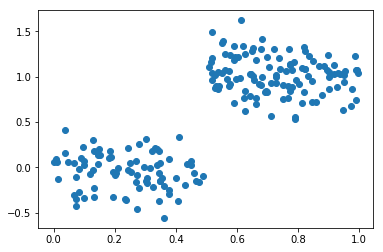

In [10]:
import matplotlib.pyplot as plt

plt.plot(dataMat[:,0], dataMat[:,1], 'o')

In [11]:
dataMat = loadDataSet('./data/ex0.txt')
dataMat = np.mat(dataMat)
regTree = createTree(dataMat)
print(regTree)

2.00369868


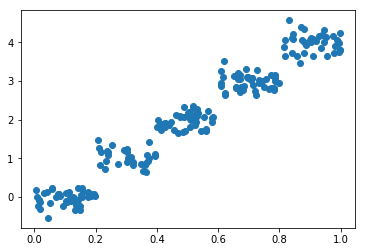

In [14]:
plt.plot(dataMat[:,1], dataMat[:,2], 'o')

In [15]:
# 剪枝

def isTree(obj):
    """判断输入变量是否是一棵树，返回布尔类型的结果"""
    return (type(obj).__name__ == 'dict')

def getMean(tree):
    """从上往下遍历树直到叶子节点为止，获取两个子节点的均值"""
    if isTree(tree['right']):
        tree['right'] = getMean(tree['right'])
    if isTree(tree['left']):
        tree['left'] = getMean(tree['left'])
    return (tree['right'] + tree['left']) / 2.0

def prune(tree, testData):
    """
    后剪枝
    :param tree: 待剪枝的树
    :param testData: 剪枝所需的测试数据
    :return:
    """
    # 如果没有测试数据，则对树进行塌陷处理
    if testData.shape[0] == 0:
        return getMean(tree)
    # 检查左右分支是否是子树还是叶节点
    if (isTree(tree['right']) or isTree(tree['left'])):
        lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])
    # 如果是子树，递归调用prune（）函数进行剪枝
    if isTree(tree['left']):
        tree['left'] = prune(tree['left'], lSet)
    if isTree(tree['right']):
        tree['right'] = prune(tree['right'], rSet)
    # 如果左右分支都是叶节点，则计算并比较合并前后的误差
    if not isTree(tree['left']) and not isTree(tree['right']):
        lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])
        errorNoMerge = sum(np.power(lSet[:, -1] - tree['left'], 2)) + sum(
            np.power(rSet[:, -1] - tree['right'], 2))
        treeMean = (tree['left'] + tree['right']) / 2
        errorMerge = sum(np.power(testData[:, -1] - treeMean, 2))
        # 如果合并后的误差小于不合并的误差，则进行合并操作，反之不进行合并操作
        if errorMerge < errorNoMerge:
            print('Merging')
            return treeMean
        else:
            return tree
    else:
        return tree

In [16]:
dataMat2 = loadDataSet('./data/ex2.txt')
dataMat2 = np.mat(dataMat2)
mytree = createTree(dataMat2,ops=(0,1))
testMat = loadDataSet('./data/ex2test.txt')
testMat = np.mat(testMat)
prunedTree = prune(mytree,testMat)
print(prunedTree)

Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
Merging
{'spInd': 0, 'spVal': 0.499171, 'left': {'spInd': 0, 'spVal': 0.729397, 'left': {'spInd': 0, 'spVal': 0.952833, 'left': {'spInd': 0, 'spVal': 0.965969, 'left': 92.5239915, 'right': {'spInd': 0, 'spVal': 0.956951, 'left': {'spInd': 0, 'spVal': 0.958512, 'left': 117.9732555, 'right': 135.837013}, 'right': 111.2013225}}, 'right': {'spInd': 0, 'spVal': 0.759504, 'left': {'spInd': 0, 'spVal': 0.763328, 'left': {'spInd': 0, 'spVal': 0.769043, 'left': {'spInd': 0, 'spVal': 0.790312, 'left': {'spInd': 0, 'spVal': 0.806158, 'left': {'spInd': 0, 'spVal': 0.815215, 'left': {'spInd': 0, 'spVal': 0.833026, 'left': {'spInd': 0, 'spVal': 0.841547, 'left': {'spInd': 0, 'spVal': 0.841625, 'left': {'spInd': 0, 'spVal': 0.944221, 'left': {'spInd': 0, 'spVal': 0.948822, 'left':

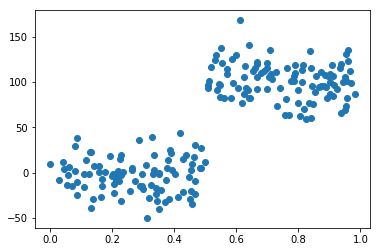

In [18]:
plt.plot(dataMat2[:,0], dataMat2[:,1], 'o')

https://zhuanlan.zhihu.com/p/139519852

https://blog.csdn.net/leaf_zizi/article/details/83503167